In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


In [2]:
#Connecting to the database named as "fananalytics"
import pymysql
pymysql.install_as_MySQLdb()
# Open database connection
db = pymysql.connect (host="localhost",port=3306,user="root",\
                      passwd="",db="fananalytics")


In [3]:
#loading matches table from mysql to csv format using python
query = 'select * from matches'
matches = pd.read_sql_query(query, db)
matches.to_csv("matches.csv")

In [4]:
# matches=pd.read_csv('matches.csv') # reading the matches file

In [5]:
import re
matches.replace('', np.nan, regex=True,inplace=True)

In [6]:
matches.head() # the dataframe has 28 different columns

,0,Unnamed: 0,winner_wickets,umpire3,team,team2,gender,season,date,competition,...,reserve_umpire,tv_umpire,match_referee,winner,winner_runs,outcome,eliminator,date2,neutralvenue,id
0,0,0,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore,male,2017,2017/04/05,Indian Premier League,...,N Pandit,A Deshmukh,J Srinath,Sunrisers Hyderabad,35.0,NaN,NaN,NaN,NaN,0\r
1,1,1,7.0,NaN,Rising Pune Supergiant,Mumbai Indians,male,2017,2017/04/06,Indian Premier League,...,Navdeep Singh,VK Sharma,M Nayyar,Rising Pune Supergiant,NaN,NaN,NaN,NaN,NaN,1\r
2,2,2,10.0,NaN,Gujarat Lions,Kolkata Knight Riders,male,2017,2017/04/07,Indian Premier League,...,K Srinivasan,YC Barde,V Narayan Kutty,Kolkata Knight Riders,NaN,NaN,NaN,NaN,NaN,2\r
3,3,3,6.0,NaN,Kings XI Punjab,Rising Pune Supergiant,male,2017,2017/04/08,Indian Premier League,...,R Pandit,KN Ananthapadmanabhan,Chinmay Sharma,Kings XI Punjab,NaN,NaN,NaN,NaN,NaN,3\r
4,4,4,NaN,NaN,Royal Challengers Bangalore,Delhi Daredevils,male,2017,2017/04/08,Indian Premier League,...,Navdeep Singh,A Nand Kishore,J Srinath,Royal Challengers Bangalore,15.0,NaN,NaN,NaN,NaN,4\r


In [7]:
matches.columns # columns in the dataframe

Index(['0', 'Unnamed: 0', 'winner_wickets', 'umpire3', 'team', 'team2',
       'gender', 'season', 'date', 'competition', 'match_number', 'venue',
       'city', 'toss_winner', 'toss_decision', 'player_of_match', 'umpire',
       'umpire2', 'reserve_umpire', 'tv_umpire', 'match_referee', 'winner',
       'winner_runs', 'outcome', 'eliminator', 'date2', 'neutralvenue', 'id'],
      dtype='object')

In [8]:
matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN

In [9]:
matches['team'].unique() # different teams listed under team1

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kings XI Punjab', 'Royal Challengers Bangalore', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Rajasthan Royals',
       'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [10]:
matches['team2'].unique()  # different teams listed under team2

array(['Royal Challengers Bangalore', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Rising Pune Supergiant',
       'Delhi Daredevils', 'Gujarat Lions', 'Sunrisers Hyderabad',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [11]:
#matches.fillna(0,inplace=True) #filling all the NaN values with 0

In [12]:
print('Total Matches Played:',matches.shape[0])      # total no.of matches
print(' \n Venues Played At:',matches['city'].unique()) # Total different venues during all seasons   
print(' \n Teams :',matches['team'].unique())     # Total teams playing during all the seasons

Total Matches Played: 636
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' nan 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi']
 
 Teams : ['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Gujarat Lions'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants']


In [13]:
print('Total venues played at:',matches['city'].nunique()) # No.of differnt cities in which matches were held
print('\nTotal umpires ',matches['umpire'].nunique())      # No. of different umpires 

Total venues played at: 29

Total umpires  44


In [14]:
print((matches['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')
print(((matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

CH Gayle  : has most man of the match awards
Mumbai Indians : has the highest number of match wins


In [15]:

matches['winner_runs']=matches['winner_runs'].astype(float)
matches['winner_wickets']=matches['winner_wickets'].astype(float)

In [16]:
df=matches.iloc[[matches['winner_runs'].idxmax()]]      # match won by largest run margin in history of IPL
df[['season','team','team2','winner','winner_runs']]

,season,team,team2,winner,winner_runs
43,2017,Delhi Daredevils,Mumbai Indians,Mumbai Indians,146.0


In [17]:
df=matches.iloc[[matches['winner_wickets'].idxmax()]]    # match won by largest wicket margin in history of IPL
df[['season','team','team2','winner','winner_wickets']]

,season,team,team2,winner,winner_wickets
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,10.0


In [18]:
matches['toss_decision'].value_counts()    # Decision of toss wins

field    361
bat      273
Name: toss_decision, dtype: int64

In [19]:
print('Toss Decisions in %\n',((matches['toss_decision']).value_counts())/634*100)   # percentage decision of toss wins overall

Toss Decisions in %
 field    56.940063
bat      43.059937
Name: toss_decision, dtype: float64


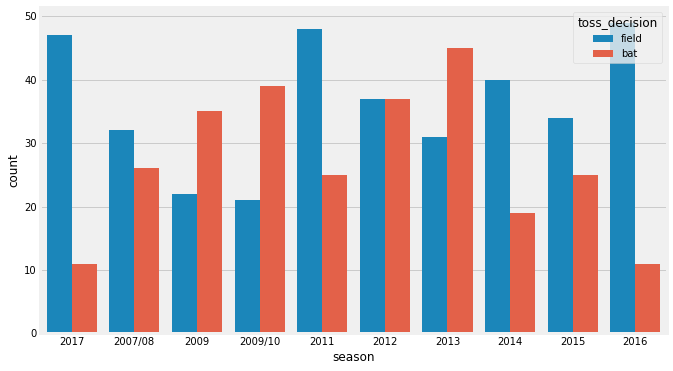

In [20]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)  # Toss decisions across seasons
plt.show()

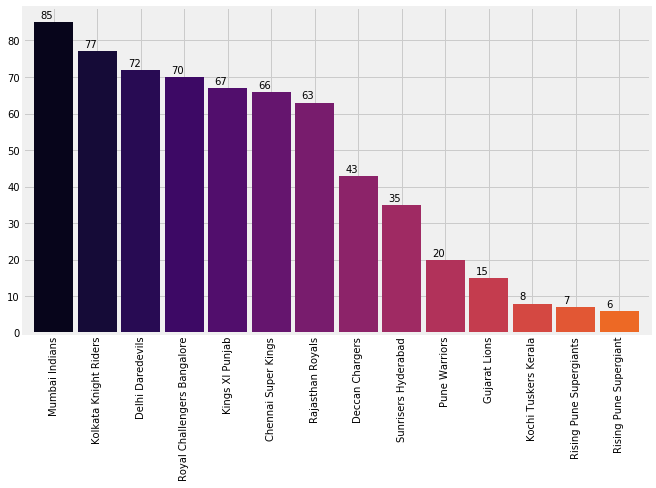

In [21]:
# Toss wins distribution across teams
plt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('inferno',20)) 
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

## Total Matches Played for Teams

In [22]:
matches_played_byteams=pd.concat([matches['team'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()

In [23]:
matches_played_byteams

,index,0
0,Mumbai Indians,157
1,Royal Challengers Bangalore,152
2,Kolkata Knight Riders,148
3,Kings XI Punjab,148
4,Delhi Daredevils,147
5,Chennai Super Kings,131
6,Rajasthan Royals,118
7,Sunrisers Hyderabad,76
8,Deccan Chargers,75
9,Pune Warriors,46


# Total matches vs wins for teams

In [24]:
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)

In [25]:
matches_played_byteams

,Total Matches,wins
Team,,
Mumbai Indians,157,91
Royal Challengers Bangalore,152,79
Kolkata Knight Riders,148,75
Kings XI Punjab,148,72
Delhi Daredevils,147,68
Chennai Super Kings,131,62
Rajasthan Royals,118,61
Sunrisers Hyderabad,76,41
Deccan Chargers,75,29


## Does the toss winner actually ends up winning the match? 

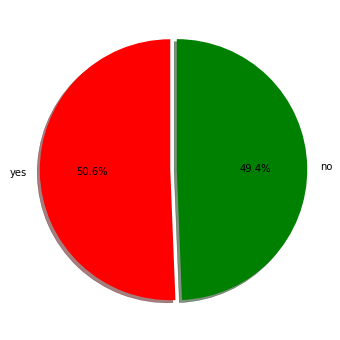

In [26]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(634-len(df))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

## Distribution of matches across seasons

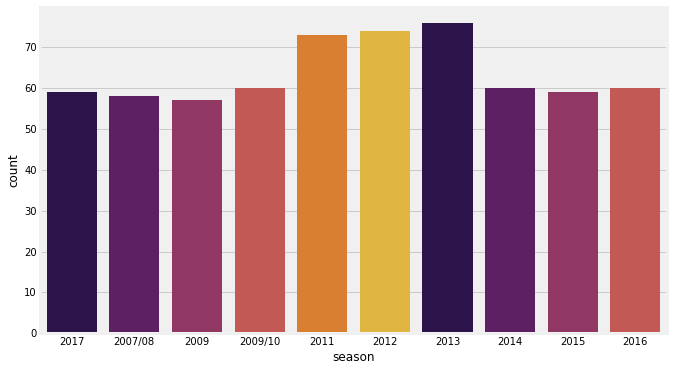

In [27]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette=sns.color_palette('inferno'))

## Player in descending order of number of times declared player of the match 

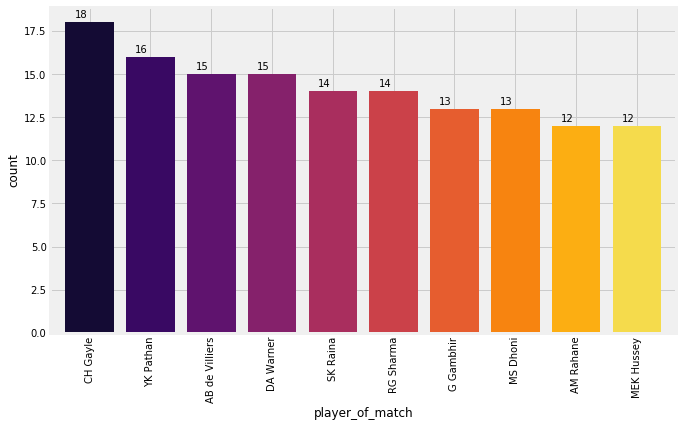

In [28]:
plt.subplots(figsize=(10,6))
#the code used is very basic but gets the job done easily
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

## Favourite Grounds

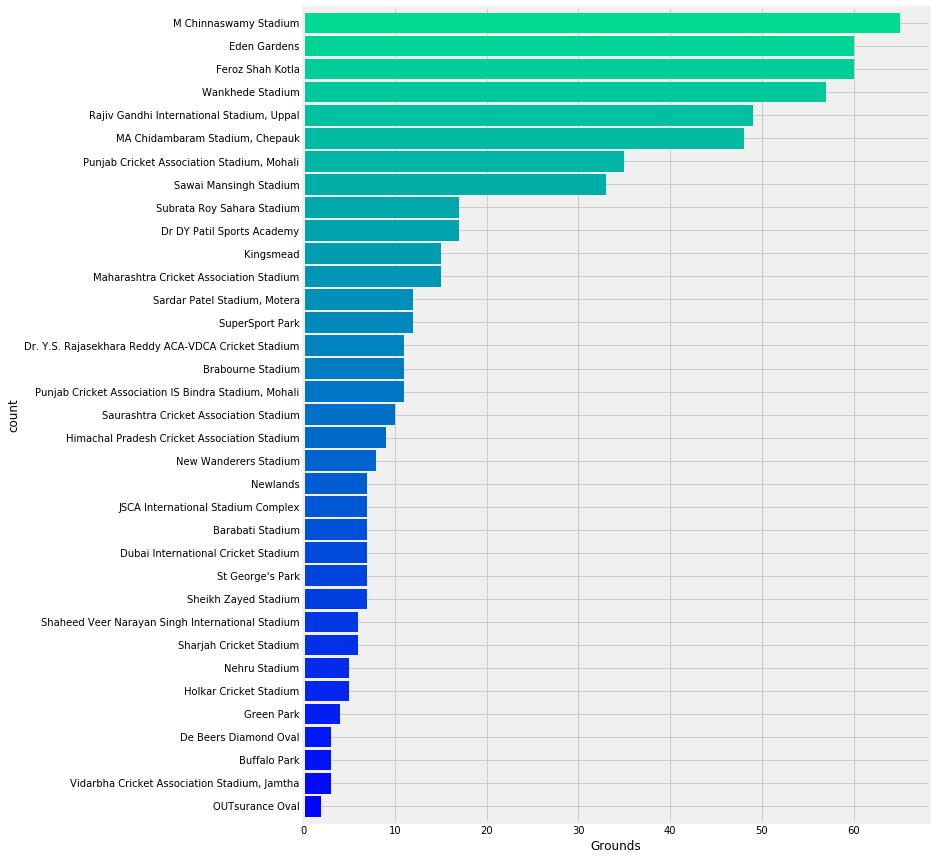

In [29]:
plt.subplots(figsize=(10,15))
venue_favourite = matches['venue'].value_counts().sort_values(ascending=True)
ax=venue_favourite.plot.barh(width=.9,color=sns.color_palette('winter',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.show()


## Winners of different seasons

In [30]:
total_seasons=matches['season'].unique()

In [31]:
total_seasons

array(['2017', '2007/08', '2009', '2009/10', '2011', '2012', '2013',
       '2014', '2015', '2016'], dtype=object)

In [32]:
print('The winners for each season are :\n')
for i in total_seasons:
    print('\n ',i,matches[matches['season']==i].iloc[-1]['winner'])

The winners for each season are :


  2017 Mumbai Indians

  2007/08 Rajasthan Royals

  2009 Deccan Chargers

  2009/10 Chennai Super Kings

  2011 Chennai Super Kings

  2012 Kolkata Knight Riders

  2013 Mumbai Indians

  2014 Kolkata Knight Riders

  2015 Mumbai Indians

  2016 Sunrisers Hyderabad


## Umpires in descending order of number of matches conducted

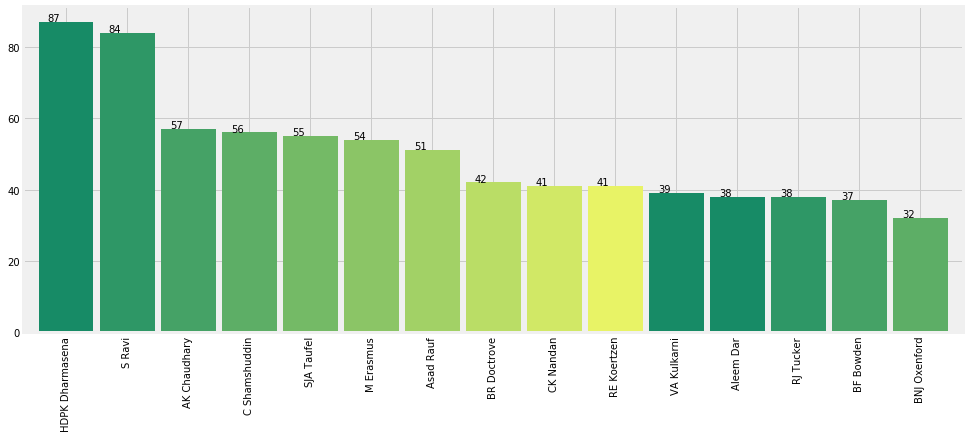

In [33]:
plt.subplots(figsize=(15,6))
ump=pd.concat([matches['umpire'],matches['umpire2']]) 
ax=ump.value_counts().head(15).plot.bar(width=0.9,color=sns.color_palette('summer',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

In [34]:
# function that shows the total number of times team1 and team2 played and also the winner among them
def winner(team1,team2):
    n = matches[((matches['team']==team1)|(matches['team']==team2))&((matches['team2']==team1)|(matches['team2']==team2))]
    plt.subplots(figsize=(10,6))
    sns.countplot(x='season',hue='winner',data=n)
    plt.show()

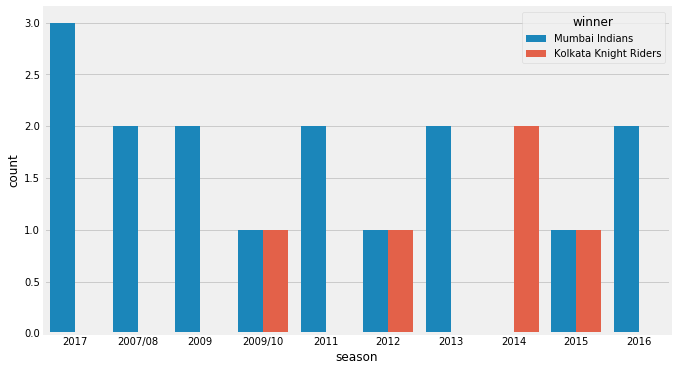

In [35]:
winner('Mumbai Indians','Kolkata Knight Riders')

In [36]:
# function that prints the encounters of team1 with other teams and the number of wins of each resectively 
def compare(team1):
    a=list(matches['team'].unique())
    b=list(a.copy())
    b.remove(team1)
    z=matches[(matches['team']==team1)|(matches['team2']==team1)]
    for i in b:
        m = (((z['team']==i)|(z['team2']==i)))&((z['team']==team1)|(z['team2']==team1))
        q = z.loc[m, 'winner'].value_counts().to_frame().T
        print(q)

In [37]:
compare('Kolkata Knight Riders')

        Kolkata Knight Riders  Sunrisers Hyderabad
winner                      7                    4
        Rising Pune Supergiant  Kolkata Knight Riders
winner                       1                      1
        Gujarat Lions  Kolkata Knight Riders
winner              3                      1
        Kolkata Knight Riders  Kings XI Punjab
winner                     13                7
        Kolkata Knight Riders  Royal Challengers Bangalore
winner                     11                            9
        Mumbai Indians  Kolkata Knight Riders
winner              16                      5
        Kolkata Knight Riders  Delhi Daredevils
winner                     12                 7
        Rajasthan Royals  Kolkata Knight Riders
winner                 7                      6
        Kolkata Knight Riders  Deccan Chargers
winner                      7                2
        Chennai Super Kings  Kolkata Knight Riders
winner                   10                      6
        